# https://www.kaggle.com/code/sazid28/home-loan-prediction/notebook

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Read train and test data
train = pd.read_csv("data/train.csv")
test = pd.read_csv("data/test.csv")

In [3]:
train_original, test_original = train.copy(), test.copy()

## Understanding the data

In [4]:
print('train: ',train.columns)
print('test: ',test.columns)
print('\n',train.dtypes)

train:  Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')
test:  Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

 Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object


In [5]:
print('Train data shape: ', train.shape)
print('Test data shape: ', test.shape)
train.head()

Train data shape:  (614, 13)
Test data shape:  (367, 12)


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


## Univariate Analysis

For categorical features we use frequency table or bar plots, which shows the number of each category in a particular variable

For numerical features, probability density plots can be used to look at the distribution of the variable

Target variable: Loand_Status feature (a categorical variable). We will look at frequency table, percentage distributino and bar plot.

In [6]:
train['Loan_Status'].count()

614

In [7]:
train['Loan_Status'].value_counts()

Loan_Status
Y    422
N    192
Name: count, dtype: int64

In [8]:
col_name = 'Loan_Status'
count = train[col_name].count()
uniq_values = set(train[col_name])
vc = train[col_name].value_counts()
for uv in uniq_values:
    print(vc[uv] ,' out of ', count ,' have ', uv , ' in ', col_name)

422  out of  614  have  Y  in  Loan_Status
192  out of  614  have  N  in  Loan_Status


422 out of 614 samples have accepted loan status and 192 samples have rejected loan status

<Axes: title={'center': 'Loan Status'}, xlabel='Loan_Status'>

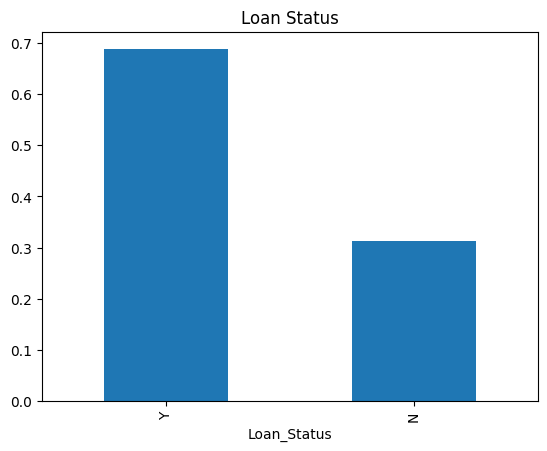

In [9]:
train['Loan_Status'].value_counts(normalize=True).plot.bar(title='Loan Status')

In [10]:
def categorical_analysis(col_name):
    # train[col_name].size
    count = train[col_name].count()
    uniq_values = set(train[col_name][train[col_name].notna()])
    vc = train[col_name].value_counts()
    print("Count: ",count)
    print("Value count: ", vc)
    for uv in uniq_values:
        print(vc[uv]/count*100 ,'% have ', uv , ' in ', col_name)
    train[col_name].value_counts(normalize=True).plot.bar(title=col_name)

Count:  614
Value count:  Loan_Status
Y    422
N    192
Name: count, dtype: int64
68.72964169381108 % have  Y  in  Loan_Status
31.27035830618892 % have  N  in  Loan_Status


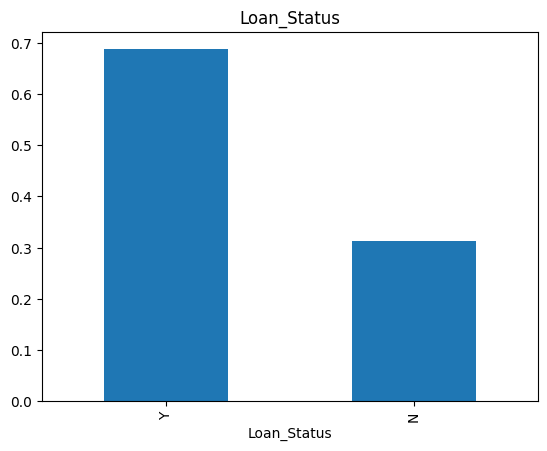

In [11]:
categorical_analysis('Loan_Status')

Count:  611
Value count:  Married
Yes    398
No     213
Name: count, dtype: int64
65.13911620294598 % have  Yes  in  Married
34.86088379705401 % have  No  in  Married


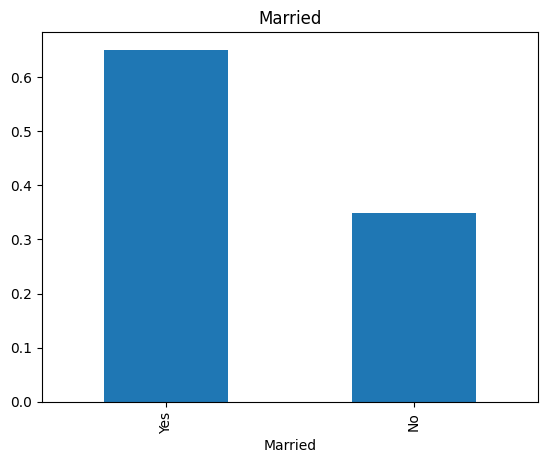

In [12]:
categorical_analysis('Married')

Count:  582
Value count:  Self_Employed
No     500
Yes     82
Name: count, dtype: int64
14.0893470790378 % have  Yes  in  Self_Employed
85.91065292096219 % have  No  in  Self_Employed


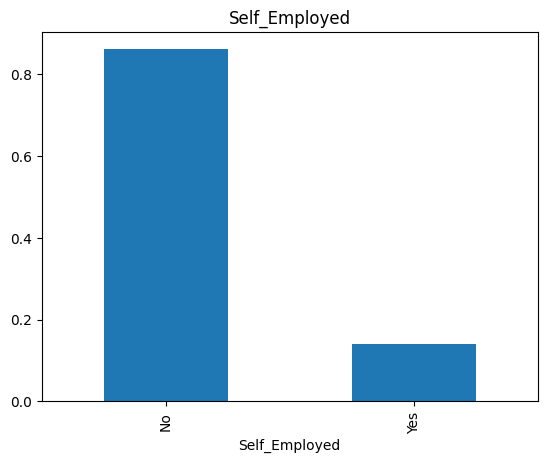

In [13]:
categorical_analysis('Self_Employed')

Count:  564
Value count:  Credit_History
1.0    475
0.0     89
Name: count, dtype: int64
15.780141843971633 % have  0.0  in  Credit_History
84.21985815602837 % have  1.0  in  Credit_History
1.0 means repaid their debts and 0.0 is not repaid their debts


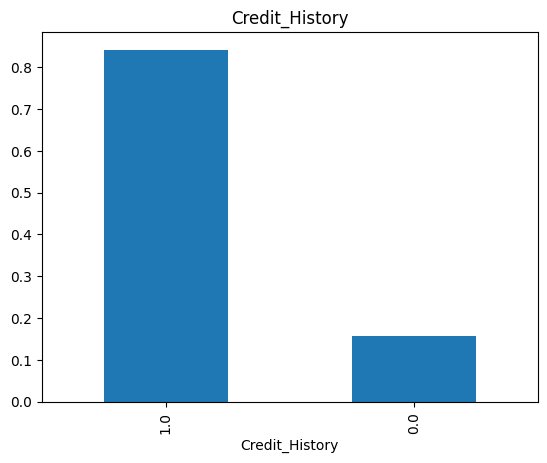

In [14]:
categorical_analysis('Credit_History')
print("1.0 means repaid their debts and 0.0 is not repaid their debts")

Count:  599
Value count:  Dependents
0     345
1     102
2     101
3+     51
Name: count, dtype: int64
8.514190317195327 % have  3+  in  Dependents
57.595993322203675 % have  0  in  Dependents
17.028380634390654 % have  1  in  Dependents
16.86143572621035 % have  2  in  Dependents
58% people have 0 dependent 
 17% people have 1 dependent 
 17% people have 2 dependent 
 8% people have 3+ dependent


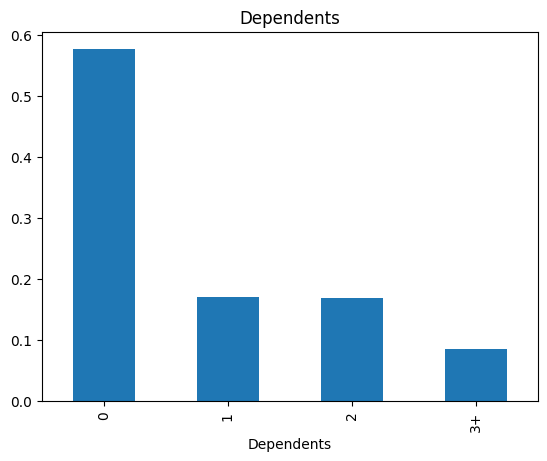

In [15]:
categorical_analysis('Dependents')
print("58% people have 0 dependent \n 17% people have 1 dependent \n 17% people have 2 dependent \n 8% people have 3+ dependent")

Count:  614
Value count:  Education
Graduate        480
Not Graduate    134
Name: count, dtype: int64
78.17589576547232 % have  Graduate  in  Education
21.824104234527688 % have  Not Graduate  in  Education


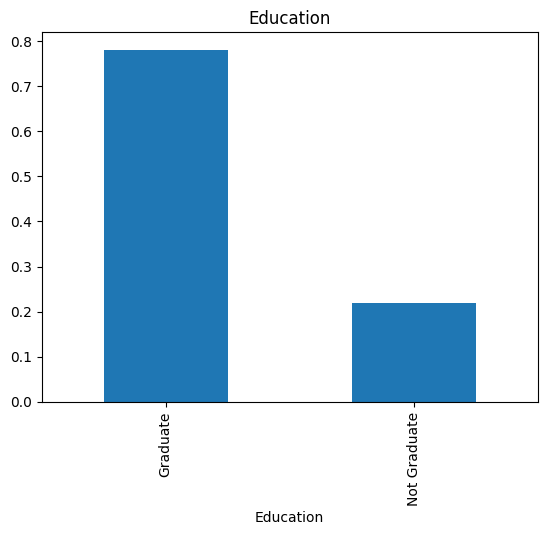

In [16]:
categorical_analysis('Education')


Count:  614
Value count:  Property_Area
Semiurban    233
Urban        202
Rural        179
Name: count, dtype: int64
37.94788273615635 % have  Semiurban  in  Property_Area
32.89902280130293 % have  Urban  in  Property_Area
29.153094462540718 % have  Rural  in  Property_Area


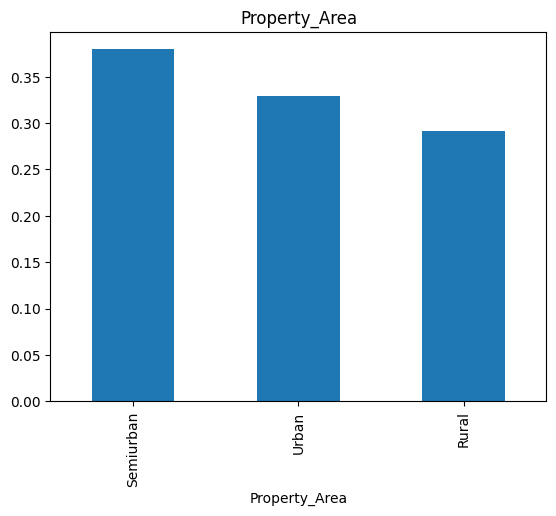

In [17]:
categorical_analysis('Property_Area')


## Applicant Income distribution

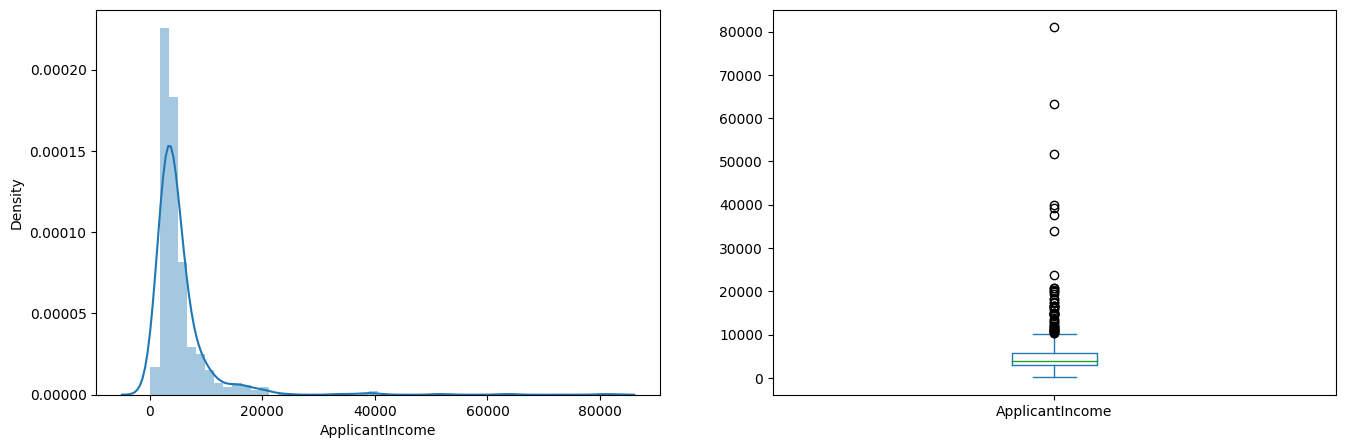

In [18]:
def show_distribution(col_name):
    plt.figure(1)
    plt.subplot(121)
    sns.distplot(train[col_name])

    plt.subplot(122)
    train[col_name].plot.box(figsize=(16,5))
show_distribution('ApplicantIncome')

It can be inferred that most of the data in the distribution of applicant income is towards left which means it is not normally distributed. 

The boxplot confirms the presence of a lot of outliers/extreme values. This can be attributed to the income disparity in the society.

Part of this can be driven by the fact that we are looking at people with different education levels. Let us segregate them by Education:

<Axes: title={'center': 'ApplicantIncome'}, xlabel='Education'>

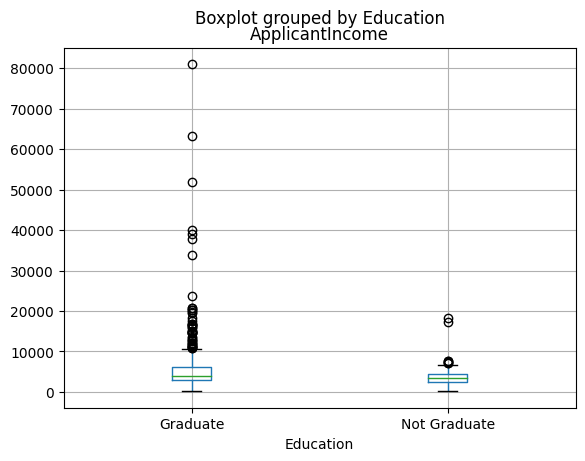

In [19]:
train.boxplot(column='ApplicantIncome',by='Education')

there are a higher number of graduates with very high incomes, which are appearing to be the outliers


## Let's look at coapplicant Income

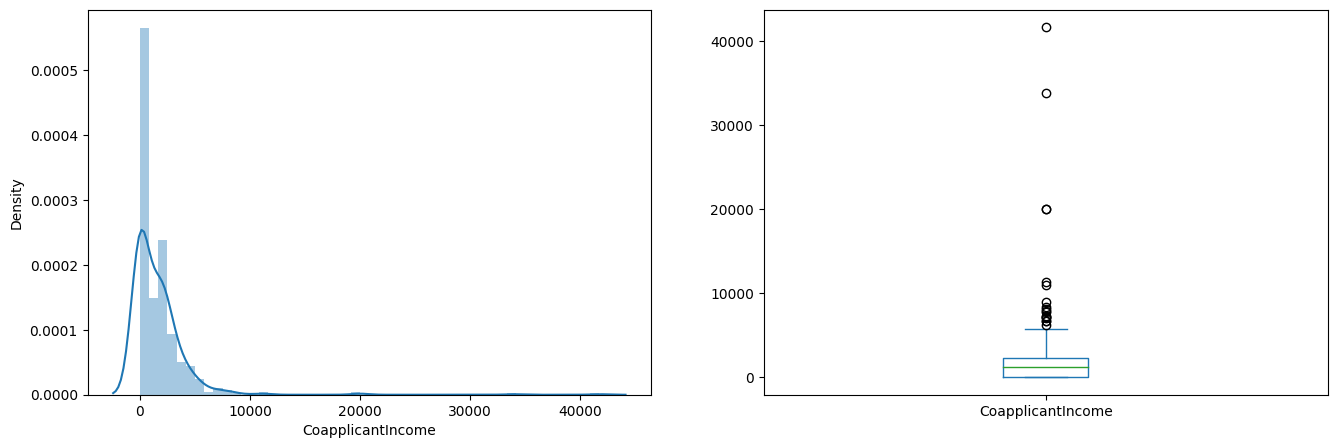

In [20]:
show_distribution('CoapplicantIncome')

We see a similar distribution as that of the applicant income. Majority of coapplicant’s income ranges from 0 to 5000. We also see a lot of outliers in the coapplicant income and it is not normally distributed.

# Loan Amount Term Variable

We see a lot of outliers in this variable and the distribution is fairly normal. We will treat the outliers in later sections.


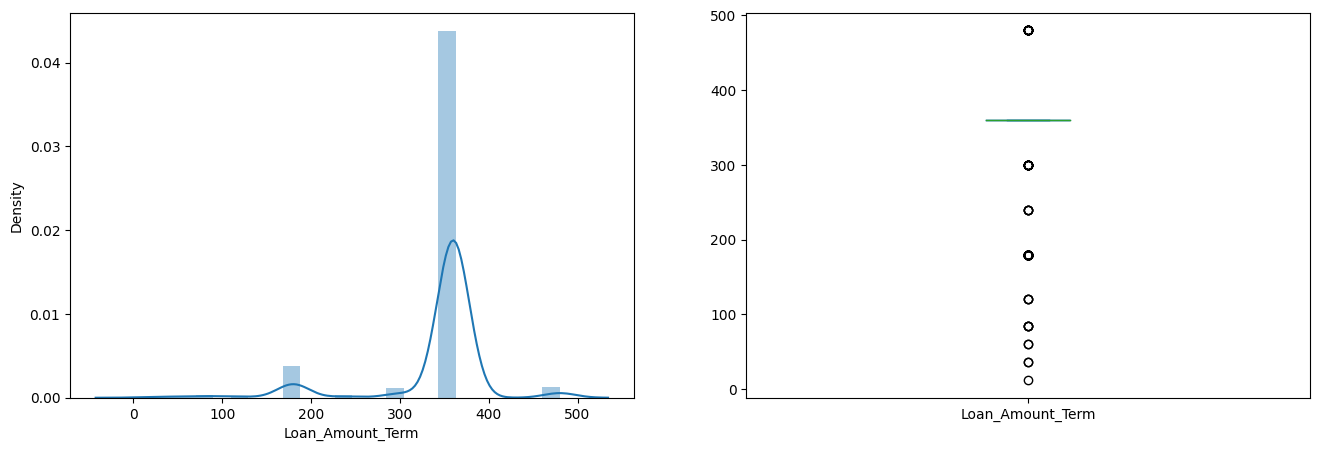

In [21]:
show_distribution('Loan_Amount_Term')
print('We see a lot of outliers in this variable and the distribution is fairly normal. We will treat the outliers in later sections.')

We see a lot of outliers in this variable and the distribution is fairly normal. We will treat the outliers in later sections.

# Bivariate Analysis

Lets recall some of hypotheses:

    i)Applicants with high income should have more chances of loan approval.

    ii)Applicants who have repaid their previous debts should have higher chances of loan approval.

    iii)Loan approval should also depend on the loan amount. If the loan amount is less, chances of loan approval should be high.

    iv)Lesser the amount to be paid monthly to repay the loan, higher the chances of loan approval.

Lets try to test the above mentioned hypotheses using bivariate analysis.

###### After looking at every variable individually in univariate analysis, we will now explore them again with respect to the target variable.



## Relation between "Loan_Status" and "Gender"¶

In [22]:
def bivar_analysis(col1, col2):
    print(pd.crosstab(train[col1],train[col2]))
    Gender = pd.crosstab(train[col1],train[col2])
    Gender.div(Gender.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
    plt.xlabel(col1)
    plt.ylabel("Percentage")

Loan_Status    N    Y
Gender               
Female        37   75
Male         150  339

Proportion of Male applicants is higher for the approved loans.



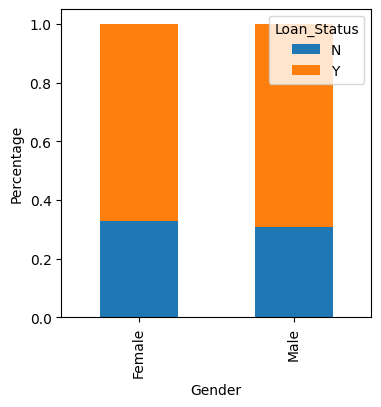

In [23]:
bivar_analysis('Gender', 'Loan_Status')
print('\nProportion of Male applicants is higher for the approved loans.\n')

## Relation between "Loan_Status" and "Married"

Loan_Status    N    Y
Married              
No            79  134
Yes          113  285

Proportion of Married applicants is higher for the approved loans.



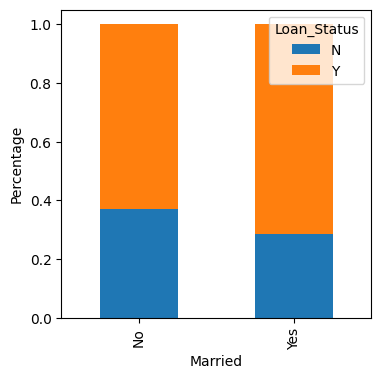

In [24]:
bivar_analysis('Married', 'Loan_Status')
print('\nProportion of Married applicants is higher for the approved loans.\n')

## Relation between "Loan_Status" and "Dependents"

Loan_Status    N    Y
Dependents           
0            107  238
1             36   66
2             25   76
3+            18   33

 Distribution of applicants with 1 or 3+ dependents is similar across both the categories of Loan_Status.



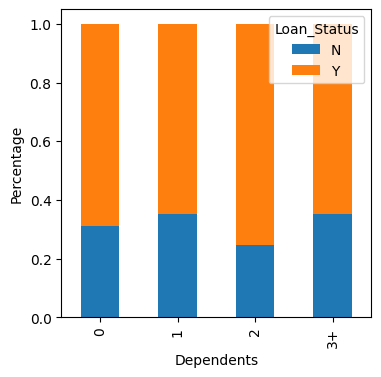

In [25]:
bivar_analysis('Dependents', 'Loan_Status')
print('\n Distribution of applicants with 1 or 3+ dependents is similar across both the categories of Loan_Status.\n')

In [26]:
238/(107+238), 66/(36+66), 76/(76+25), 33/(33+18)

(0.6898550724637681,
 0.6470588235294118,
 0.7524752475247525,
 0.6470588235294118)

## Relation between "Loan_Status" and "Education"

Loan_Status     N    Y
Education             
Graduate      140  340
Not Graduate   52   82

 Proportion of Graduate applicants is higher for the approved loans.



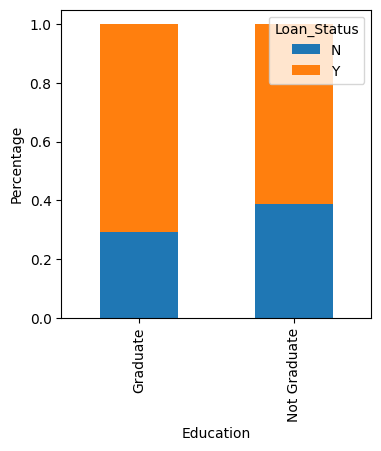

In [27]:
bivar_analysis('Education', 'Loan_Status')
print('\n Proportion of Graduate applicants is higher for the approved loans.\n')

## Relation between "Loan_Status" and "Self-Employed"

Loan_Status      N    Y
Self_Employed          
No             157  343
Yes             26   56

 There is nothing significant we can infer from Self_Employed vs Loan_Status plot.



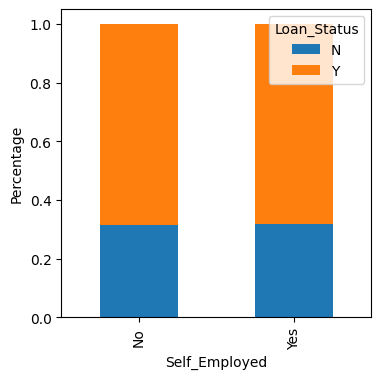

In [28]:
bivar_analysis('Self_Employed', 'Loan_Status')
print('\n There is nothing significant we can infer from Self_Employed vs Loan_Status plot.\n')

## Relation between "Loan_Status" and "Credit History"

Loan_Status      N    Y
Credit_History         
0.0             82    7
1.0             97  378

 It seems people with credit history as 1 are more likely to get their loans approved.



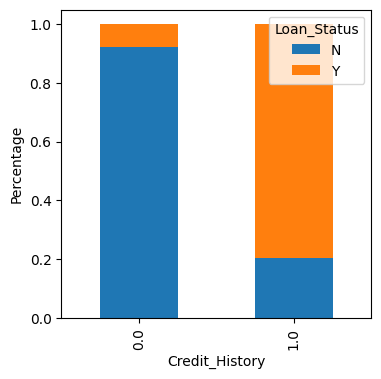

In [29]:
bivar_analysis('Credit_History', 'Loan_Status')
print('\n It seems people with credit history as 1 are more likely to get their loans approved.\n')

## Relation between "Loan_Status" and "Property Area"

Loan_Status     N    Y
Property_Area         
Rural          69  110
Semiurban      54  179
Urban          69  133

 Proportion of loans getting approved in semiurban area is higher as compared to that in rural or urban areas



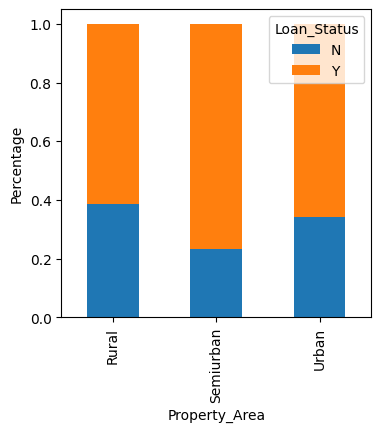

In [30]:
bivar_analysis('Property_Area', 'Loan_Status')
print('\n Proportion of loans getting approved in semiurban area is higher as compared to that in rural or urban areas\n')

# relationship between independent numerical variables and target variable (Income)

### Relation between Loan Status and Income

We will try to find the mean income of people for which the loan has been approved vs the mean income of people for which the loan has not been approved.

## Relation between "Loan_Status" and "Property Area"


Here the y-axis represents the mean applicant income. We don’t see any change in the mean income. So, let’s make bins for the applicant income variable based on the values in it and analyze the corresponding loan status for each bin.


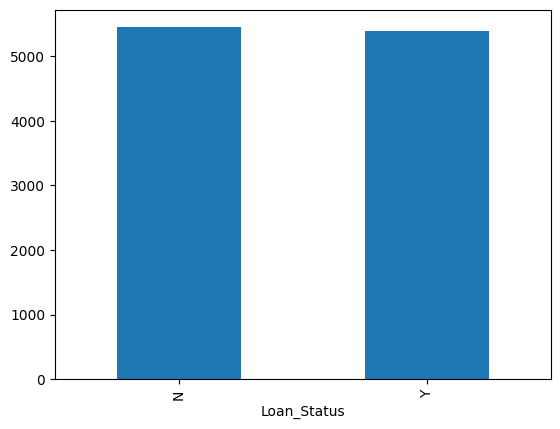

In [31]:
train.groupby("Loan_Status")['ApplicantIncome'].mean().plot.bar()

print("\nHere the y-axis represents the mean applicant income. We don’t see any change in the mean income. So, let’s make bins for the applicant income variable based on the values in it and analyze the corresponding loan status for each bin.")



So, let’s make bins for the applicant income variable based on the values in it and analyze the corresponding loan status for each bin.

In [32]:
bins=[0,2500,4000,6000,81000]
group=['Low','Average','High', 'Very high']
train['Income_bin']=pd.cut(train['ApplicantIncome'],bins,labels=group)

Loan_Status   N    Y
Income_bin          
Low          34   74
Average      67  159
High         45   98
Very high    46   91


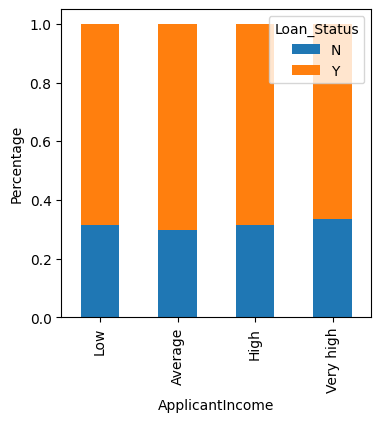

In [33]:
print(pd.crosstab(train["Income_bin"],train["Loan_Status"]))
Income_bin = pd.crosstab(train["Income_bin"],train["Loan_Status"])
Income_bin.div(Income_bin.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.xlabel("ApplicantIncome")
plt.ylabel("Percentage")
plt.show()

It can be inferred that Applicant income does not affect the chances of loan approval which contradicts our hypothesis in which we assumed that if the applicant income is high the chances of loan approval will also be high.

We will analyze the coapplicant income and loan amount variable in similar way.



In [34]:
bins=[0,1000,3000,42000]
group =['Low','Average','High']
train['CoapplicantIncome_bin']=pd.cut(train["CoapplicantIncome"],bins,labels=group)

Loan_Status             N    Y
CoapplicantIncome_bin         
Low                     3   19
Average                61  161
High                   32   65


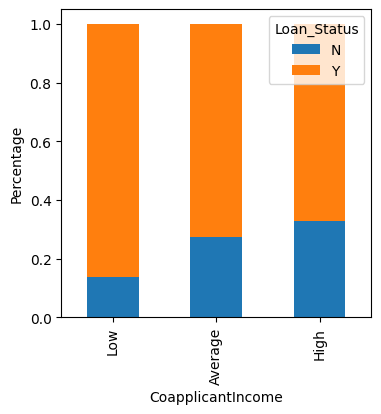

In [35]:
print(pd.crosstab(train["CoapplicantIncome_bin"],train["Loan_Status"]))
CoapplicantIncome_Bin = pd.crosstab(train["CoapplicantIncome_bin"],train["Loan_Status"])
CoapplicantIncome_Bin.div(CoapplicantIncome_Bin.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(4,4))
plt.xlabel("CoapplicantIncome")
plt.ylabel("Percentage")
plt.show()

It shows that if coapplicant’s income is less the chances of loan approval are high. But this does not look right. The possible reason behind this may be that most of the applicants don’t have any coapplicant so the coapplicant income for such applicants is 0 and hence the loan approval is not dependent on it. So we can make a new variable in which we will combine the applicant’s and coapplicant’s income to visualize the combined effect of income on loan approval.

Loan_Status       N    Y
TotalIncome_bin         
Low              14   10
Average          32   87
High             65  159
Very High        81  166


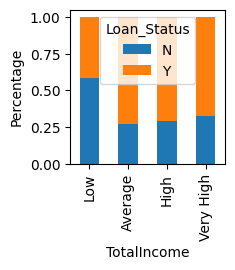

In [36]:
train["TotalIncome"]=train["ApplicantIncome"]+train["CoapplicantIncome"]

bins =[0,2500,4000,6000,81000]
group=['Low','Average','High','Very High']
train["TotalIncome_bin"]=pd.cut(train["TotalIncome"],bins,labels=group)

print(pd.crosstab(train["TotalIncome_bin"],train["Loan_Status"]))
TotalIncome = pd.crosstab(train["TotalIncome_bin"],train["Loan_Status"])
TotalIncome.div(TotalIncome.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(2,2))
plt.xlabel("TotalIncome")
plt.ylabel("Percentage")
plt.show()

We can see that Proportion of loans getting approved for applicants having low Total_Income is very less as compared to that of applicants with Average, High and Very High Income.

### Relation between "Loan_Status" and "Loan Amount"

Loan_Status       N    Y
LoanAmount_bin          
Low              47  107
Average         103  255
High             31   49


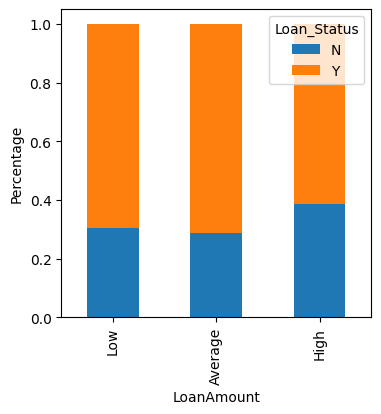


 It can be seen that the proportion of approved loans is higher for Low and Average Loan Amount as compared to that of High Loan Amount which supports our hypothesis in which we considered that the chances of loan approval will be high when the loan amount is less.



In [37]:
bins = [0,100,200,700]
group=['Low','Average','High']
train["LoanAmount_bin"]=pd.cut(train["LoanAmount"],bins,labels=group)

print(pd.crosstab(train["LoanAmount_bin"],train["Loan_Status"]))
LoanAmount=pd.crosstab(train["LoanAmount_bin"],train["Loan_Status"])
LoanAmount.div(LoanAmount.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(4,4))
plt.xlabel("LoanAmount")
plt.ylabel("Percentage")
plt.show()
print('\n It can be seen that the proportion of approved loans is higher for Low and Average Loan Amount as compared to that of High Loan Amount which supports our hypothesis in which we considered that the chances of loan approval will be high when the loan amount is less.\n')

In [38]:
# Let’s drop the bins which we created for the exploration part. We will change the 3+ in dependents variable to 3 to make it a numerical variable
train=train.drop(["Income_bin","CoapplicantIncome_bin","LoanAmount_bin","TotalIncome","TotalIncome_bin"],axis=1)

train['Dependents'].replace('3+',3,inplace=True)
test['Dependents'].replace('3+',3,inplace=True)
train['Loan_Status'].replace('N', 0,inplace=True)
train['Loan_Status'].replace('Y', 1,inplace=True)

Now lets look at the correlation between all the numerical variables. We will use the heat map to visualize the correlation. Heatmaps visualize data through variations in coloring. The variables with darker color means their correlation is more.

In [39]:
train.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status            int64
dtype: object

<Axes: >

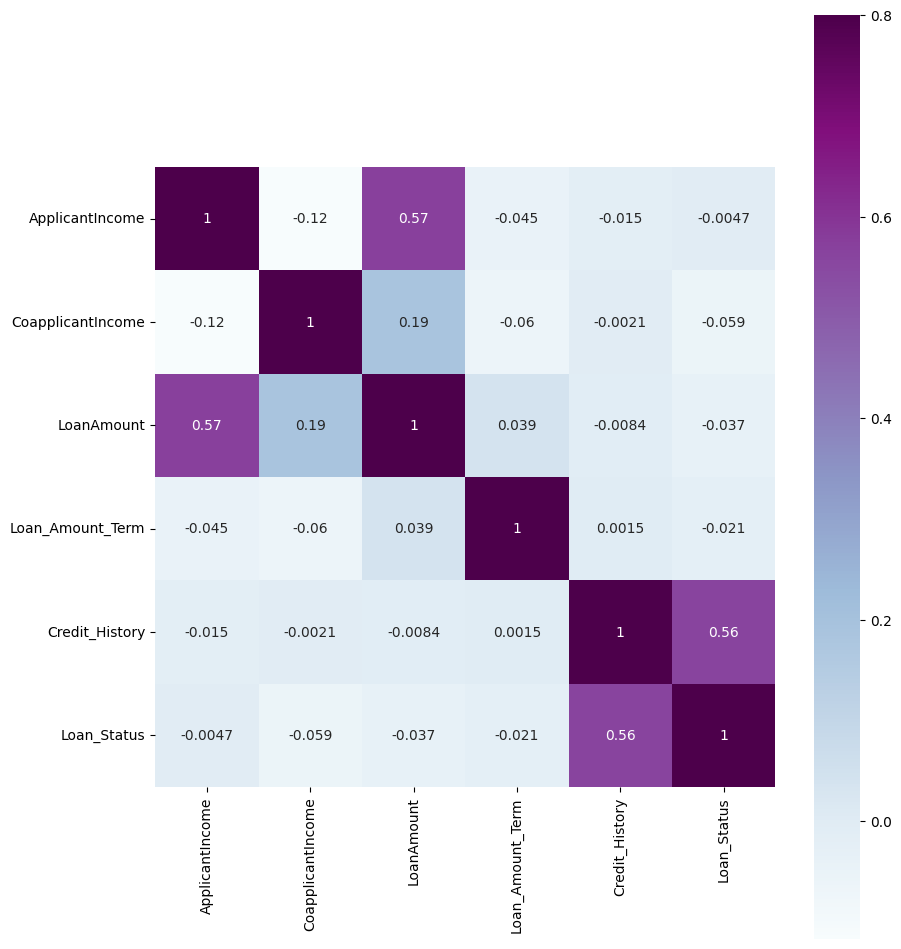

In [40]:
matrix = train.select_dtypes(include=['number']).corr()
f, ax = plt.subplots(figsize=(10, 12))
sns.heatmap(matrix, vmax=.8, square=True, cmap="BuPu",annot=True)

We see that the most correlated variables are (ApplicantIncome - LoanAmount) and (Credit_History - Loan_Status).

# Missing Value and Outlier Treatment

After exploring all the variables in our data, we can now impute the missing values and treat the outliers because missing data and outliers can have adverse effect on the model performance.

### Missing value imputation
Let’s list out feature-wise count of missing values.



In [41]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

There are missing values in Gender, Married, Dependents, Self_Employed, LoanAmount, Loan_Amount_Term and Credit_History features.

We will treat the missing values in all the features one by one.

We can consider these methods to fill the missing values:

For numerical variables: imputation using mean or median

For categorical variables: imputation using mode

There are very less missing values in Gender, Married, Dependents, Credit_History and Self_Employed features so we can fill them using the mode of the features

In [42]:
train["Gender"].fillna(train["Gender"].mode()[0],inplace=True)
train["Married"].fillna(train["Married"].mode()[0],inplace=True)
train['Dependents'].fillna(train["Dependents"].mode()[0],inplace=True)
train["Self_Employed"].fillna(train["Self_Employed"].mode()[0],inplace=True)
train["Credit_History"].fillna(train["Credit_History"].mode()[0],inplace=True)

Now let’s try to find a way to fill the missing values in Loan_Amount_Term. We will look at the value count of the Loan amount term variable.

In [43]:
train["Loan_Amount_Term"].value_counts()

Loan_Amount_Term
360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: count, dtype: int64

It can be seen that in loan amount term variable, the value of 360 is repeating the most. So we will replace the missing values in this variable using the mode of this variable.

In [44]:
train["Loan_Amount_Term"].fillna(train["Loan_Amount_Term"].mode()[0],inplace=True)
train["Loan_Amount_Term"].value_counts()

Loan_Amount_Term
360.0    526
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: count, dtype: int64

Now we will see the LoanAmount variable. As it is a numerical variable, we can use mean or median to impute the missing values.

We will use median to fill the null values as earlier we saw that loan amount have outliers so the mean will not be the proper approach as it is highly affected by the presence of outliers.

In [45]:
train["LoanAmount"].fillna(train["LoanAmount"].median(),inplace=True)
train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

### Let’s fill all the missing values in the test dataset too with the same approach

In [46]:
test.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [47]:
test["Gender"].fillna(test["Gender"].mode()[0],inplace=True)
test['Dependents'].fillna(test["Dependents"].mode()[0],inplace=True)
test["Self_Employed"].fillna(test["Self_Employed"].mode()[0],inplace=True)
test["Loan_Amount_Term"].fillna(test["Loan_Amount_Term"].mode()[0],inplace=True)
test["Credit_History"].fillna(test["Credit_History"].mode()[0],inplace=True)
test["LoanAmount"].fillna(test["LoanAmount"].median(),inplace=True)

test.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

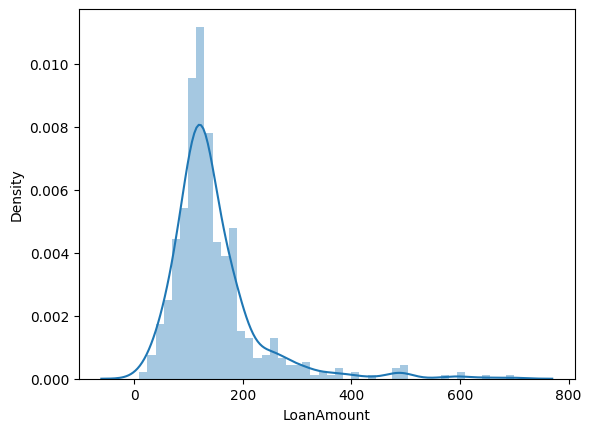

In [48]:
sns.distplot(train["LoanAmount"]);

<Axes: >

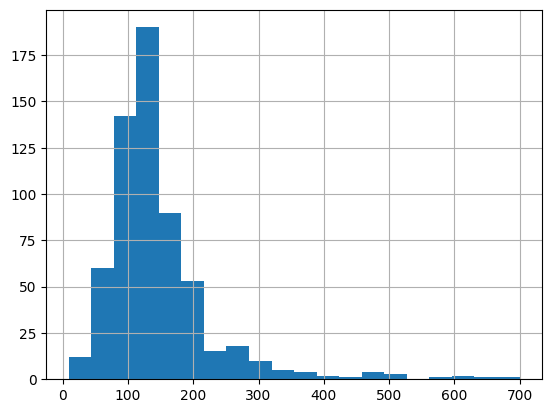

In [49]:
train['LoanAmount'].hist(bins=20)


Due to these outliers bulk of the data in the loan amount is at the left and the right tail is longer. This is called right skewness.

One way to remove the skewness is by doing the log transformation. As we take the log transformation, it does not affect the smaller values much, but reduces the larger values.

So, we get a distribution similar to normal distribution.

Let’s visualize the effect of log transformation.

We will do the similar changes to the test file simultaneously

<Axes: >

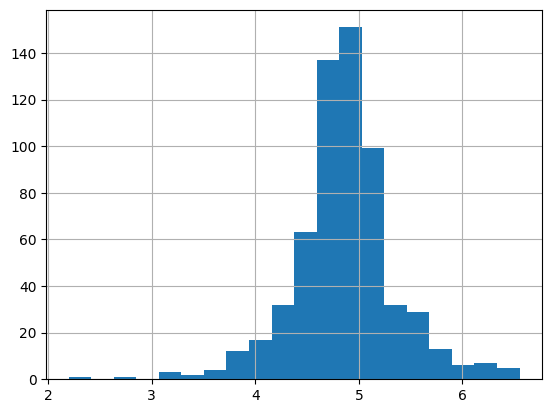

In [50]:
train['LoanAmount_log'] = np.log(train['LoanAmount'])
train['LoanAmount_log'].hist(bins=20)


<Axes: xlabel='LoanAmount_log', ylabel='Density'>

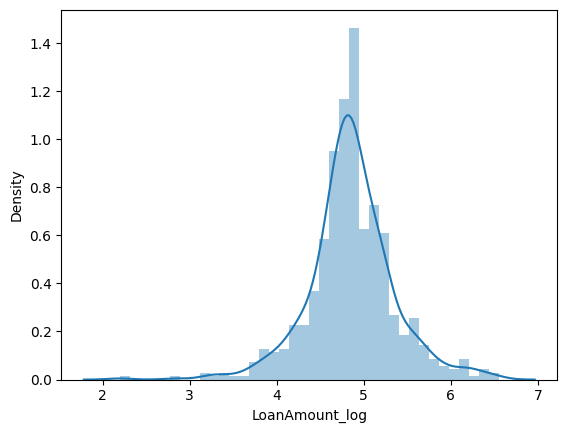

In [51]:
sns.distplot(train["LoanAmount_log"])

### Let's have a look in test set [LoanAmount]

<Axes: >

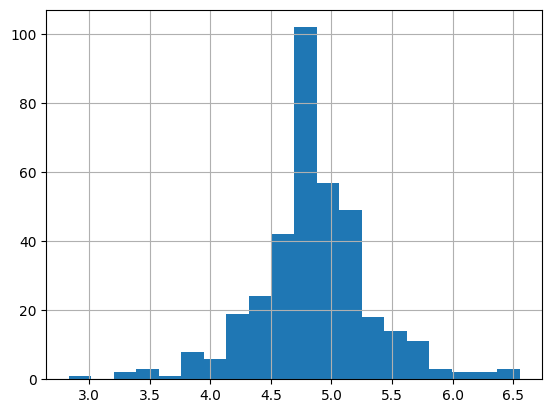

In [52]:
test["LoanAmount_log"]=np.log(train["LoanAmount"])
test['LoanAmount_log'].hist(bins=20)

<Axes: xlabel='LoanAmount_log', ylabel='Density'>

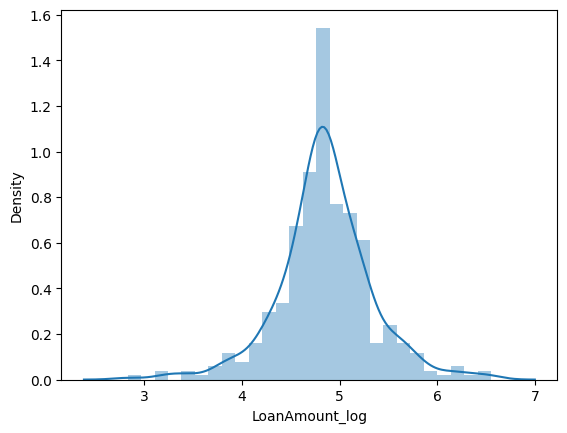

In [53]:
sns.distplot(test["LoanAmount_log"])

# Feature Engineering

Based on the domain knowledge, we can come up with new features that might affect the target variable. We will create the following three new features:

Total Income - As discussed during bivariate analysis we will combine the Applicant Income and Coapplicant Income. If the total income is high, chances of loan approval might also be high.

EMI - EMI is the monthly amount to be paid by the applicant to repay the loan. Idea behind making this variable is that people who have high EMI’s might find it difficult to pay back the loan. We can calculate the EMI by taking the ratio of loan amount with respect to loan amount term.

Balance Income - This is the income left after the EMI has been paid. Idea behind creating this variable is that if this value is high, the chances are high that a person will repay the loan and hence increasing the chances of loan approval.

In [54]:
train["TotalIncome"]=train["ApplicantIncome"]+train["CoapplicantIncome"]
train[["TotalIncome"]].head()

,TotalIncome
0,5849.0
1,6091.0
2,3000.0
3,4941.0
4,6000.0


In [55]:
test["TotalIncome"]=test["ApplicantIncome"]+test["CoapplicantIncome"]
test["TotalIncome"].head()

0    5720
1    4576
2    6800
3    4886
4    3276
Name: TotalIncome, dtype: int64

### Let’s check the distribution of train dataset Total Income.

<Axes: xlabel='TotalIncome', ylabel='Density'>

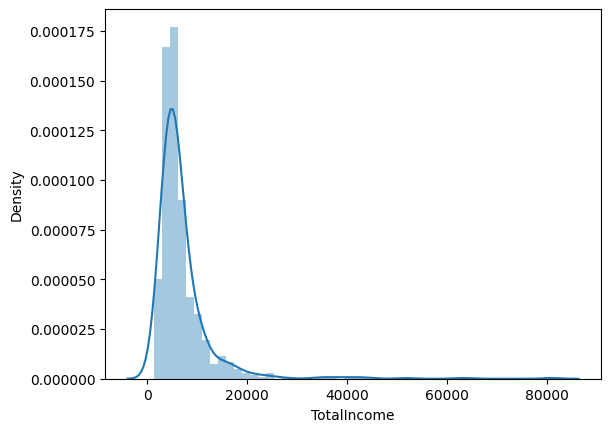

In [56]:
sns.distplot(train["TotalIncome"])

e can see it is shifted towards left, i.e., the distribution is right skewed. So, let’s take the log transformation to make the distribution normal.

<Axes: xlabel='TotalIncome_log', ylabel='Density'>

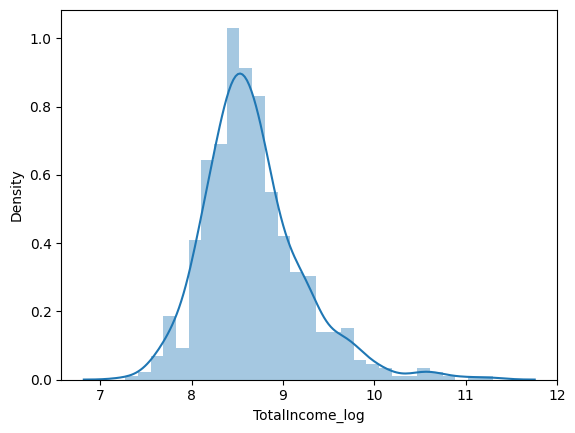

In [57]:
train["TotalIncome_log"]=np.log(train["TotalIncome"])
sns.distplot(train["TotalIncome_log"])

Now the distribution looks much closer to normal and effect of extreme values has been significantly subsided.

Let’s check the distribution of test dataset Total Income.

<Axes: xlabel='TotalIncome', ylabel='Density'>

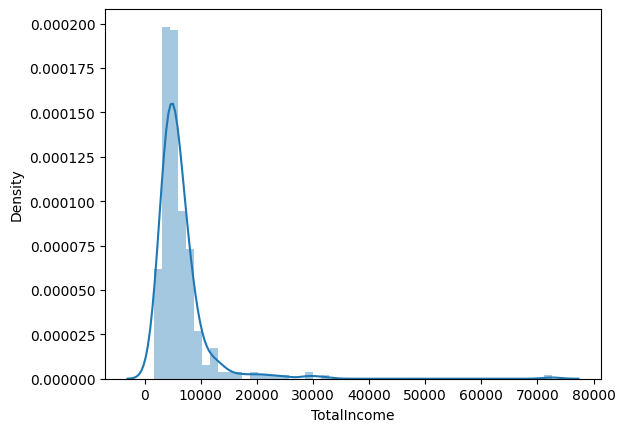

In [58]:
sns.distplot(test["TotalIncome"])

<Axes: xlabel='TotalIncome_log', ylabel='Density'>

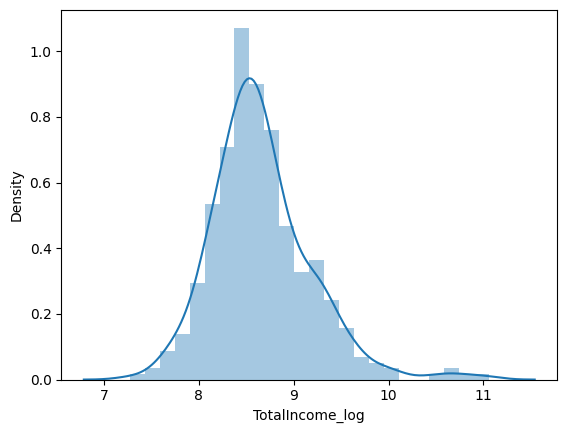

In [59]:
test["TotalIncome_log"] = np.log(train["TotalIncome"])
sns.distplot(test["TotalIncome_log"])

### Now create the EMI feature.

In [60]:
train["EMI"]=train["LoanAmount"]/train["Loan_Amount_Term"]
test["EMI"]=test["LoanAmount"]/test["Loan_Amount_Term"]
test["EMI"].head()

0    0.305556
1    0.350000
2    0.577778
3    0.277778
4    0.216667
Name: EMI, dtype: float64

Let’s check the distribution of EMI variable.



<Axes: xlabel='EMI', ylabel='Density'>

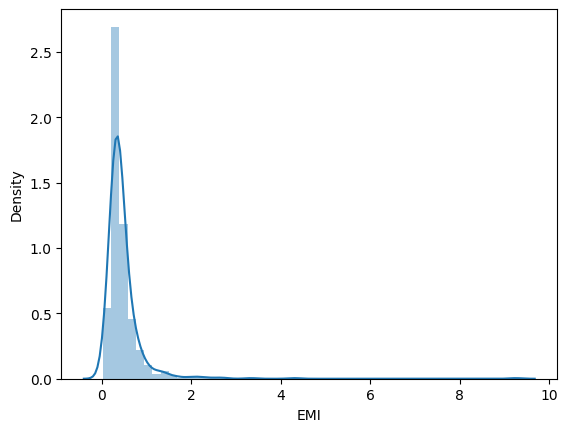

In [61]:
sns.distplot(train["EMI"])

<Axes: xlabel='EMI', ylabel='Density'>

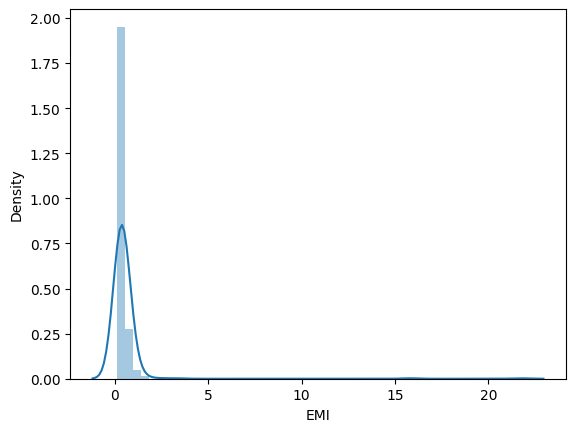

In [62]:
sns.distplot(test["EMI"])

#### Let's create Balance Income feature now and check its distribution.

In [63]:
train["Balance_Income"] = train["TotalIncome"]-train["EMI"]*1000 # To make the units equal we multiply with 1000
test["Balance_Income"] = test["TotalIncome"]-test["EMI"]
train[["Balance_Income"]].head()

,Balance_Income
0,5493.444444
1,5735.444444
2,2816.666667
3,4607.666667
4,5608.333333


Let us now drop the variables which we used to create these new features. Reason for doing this is, the correlation between those old features and these new features will be very high and logistic regression assumes that the variables are not highly correlated. We also wants to remove the noise from the dataset, so removing correlated features will help in reducing the noise too.

In [64]:
train=train.drop(["ApplicantIncome","CoapplicantIncome","LoanAmount","Loan_Amount_Term"],axis=1)

In [65]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,LoanAmount_log,TotalIncome,TotalIncome_log,EMI,Balance_Income
0,LP001002,Male,No,0,Graduate,No,1.0,Urban,1,4.852030,5849.0,8.674026,0.355556,5493.444444
1,LP001003,Male,Yes,1,Graduate,No,1.0,Rural,0,4.852030,6091.0,8.714568,0.355556,5735.444444
2,LP001005,Male,Yes,0,Graduate,Yes,1.0,Urban,1,4.189655,3000.0,8.006368,0.183333,2816.666667
3,LP001006,Male,Yes,0,Not Graduate,No,1.0,Urban,1,4.787492,4941.0,8.505323,0.333333,4607.666667
4,LP001008,Male,No,0,Graduate,No,1.0,Urban,1,4.948760,6000.0,8.699515,0.391667,5608.333333


In [66]:
test = test.drop(["ApplicantIncome","CoapplicantIncome","LoanAmount","Loan_Amount_Term"],axis=1)
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,LoanAmount_log,TotalIncome,TotalIncome_log,EMI,Balance_Income
0,LP001015,Male,Yes,0,Graduate,No,1.0,Urban,4.852030,5720,8.674026,0.305556,5719.694444
1,LP001022,Male,Yes,1,Graduate,No,1.0,Urban,4.852030,4576,8.714568,0.350000,4575.650000
2,LP001031,Male,Yes,2,Graduate,No,1.0,Urban,4.189655,6800,8.006368,0.577778,6799.422222
3,LP001035,Male,Yes,2,Graduate,No,1.0,Urban,4.787492,4886,8.505323,0.277778,4885.722222
4,LP001051,Male,No,0,Not Graduate,No,1.0,Urban,4.948760,3276,8.699515,0.216667,3275.783333


# Building a ML Model for classification
After creating new features, we can continue the model building process. So we will start with logistic regression model and then move over to more complex models like RandomForest and XGBoost

We will build the following models in this section.

i)Logistic Regression

ii)Decision Tree

iii)Random Forest

iv)Random Forest with Grid Search

v)XGBClassifier

Let’s prepare the data for feeding into the models.

Let's drop the "Loan_ID" variable as it do not have any effect on the loan status. We will do the same changes to the test dataset which we did for the training dataset.

In [67]:
train=train.drop("Loan_ID",axis=1)
test=test.drop("Loan_ID",axis=1)

We will use scikit-learn (sklearn) for making different models which is an open source library for Python. It is one of the most efficient tool which contains many inbuilt functions that can be used for modeling in Python.

Sklearn requires the target variable in a separate dataset. So, we will drop our target variable from the train dataset and save it in another dataset.

droping the target variable "Loan_Status"

In [73]:
y=train.pop("Loan_Status")

In [78]:
x=train.copy()
x.head(2)

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,LoanAmount_log,TotalIncome,TotalIncome_log,EMI,Balance_Income
0,Male,No,0,Graduate,No,1.0,Urban,4.85203,5849.0,8.674026,0.355556,5493.444444
1,Male,Yes,1,Graduate,No,1.0,Rural,4.85203,6091.0,8.714568,0.355556,5735.444444


Now we will make dummy variables for the categorical variables. Dummy variable turns categorical variables into a series of 0 and 1, making them lot easier to quantify and compare.

Let us understand the process of dummies first:

Consider the “Gender” variable. It has two classes, Male and Female.

As logistic regression takes only the numerical values as input, we have to change male and female into numerical value.

Once we apply dummies to this variable, it will convert the “Gender” variable into two variables(Gender_Male and Gender_Female), one for each class, i.e. Male and Female.

Gender_Male will have a value of 0 if the gender is Female and a value of 1 if the gender is Male.

In [79]:
x = pd.get_dummies(x)
x.head(3)

,Credit_History,LoanAmount_log,TotalIncome,TotalIncome_log,EMI,Balance_Income,Gender_Female,Gender_Male,Married_No,Married_Yes,...,Dependents_0,Dependents_1,Dependents_2,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,1.0,4.852030,5849.0,8.674026,0.355556,5493.444444,False,True,True,False,...,True,False,False,True,False,True,False,False,False,True
1,1.0,4.852030,6091.0,8.714568,0.355556,5735.444444,False,True,False,True,...,False,True,False,True,False,True,False,True,False,False
2,1.0,4.189655,3000.0,8.006368,0.183333,2816.666667,False,True,False,True,...,True,False,False,True,False,False,True,False,False,True


In [80]:
train=pd.get_dummies(train)
test=pd.get_dummies(test)

Now we will train the model on training dataset and make predictions for the test dataset. But can we validate these predictions? One way of doing this is we can divide our train dataset into two parts:train and validation. We can train the model on this train part and using that make predictions for the validation part. In this way we can validate our predictions as we have the true predictions for the validation part (which we do not have for the test dataset).

We will use the train_test_split function from sklearn to divide our train dataset. So, first let us import train_test_split.



In [82]:
from sklearn.model_selection import train_test_split
# 70% data will use for train the model and rest of the 30% data will use for checking validation of the model.
x_train,x_cv,y_train,y_cv=train_test_split(x,y,test_size=0.3,random_state=1)

# Logistic Regression

In [87]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

logistic_model = LogisticRegression(random_state=1)
logistic_model.fit(x_train,y_train)

pred_cv_logistic=logistic_model.predict(x_cv)

#Now calculate how accurate our predictions are by calculating the accuracy
score_logistic =accuracy_score(pred_cv_logistic,y_cv)*100 
score_logistic

75.67567567567568

So our predictions are almost 76% accurate, i.e. we have identified 76% of the loan status correctly for our logistic regression model.

# Decision Tree

In [92]:
from sklearn.tree import DecisionTreeClassifier
tree_model = DecisionTreeClassifier(random_state=1)
tree_model.fit(x_train,y_train)
pred_cv_tree=tree_model.predict(x_cv)
score_tree =accuracy_score(pred_cv_tree,y_cv)*100 
print('accuracy: ', score_tree)
print('our predictions are almost 71% accurate, i.e. we have identified 71% of the loan status correctly for our Decision tree model')

accuracy:  71.35135135135135
our predictions are almost 71% accurate, i.e. we have identified 71% of the loan status correctly for our Decision tree model


# Random Forest

RandomForest is a tree based bootstrapping algorithm wherein a certain no. of weak learners (decision trees) are combined to make a powerful prediction model.

ii)For every individual learner, a random sample of rows and a few randomly chosen variables are used to build a decision tree model.

iii)Final prediction can be a function of all the predictions made by the individual learners.

Let's import Random Forest Classifier

In [93]:
from sklearn.ensemble import RandomForestClassifier
forest_model = RandomForestClassifier(random_state=1,max_depth=10,n_estimators=50)
forest_model.fit(x_train,y_train)
pred_cv_forest=forest_model.predict(x_cv)
score_forest = accuracy_score(pred_cv_forest,y_cv)*100
print("accuracy: ", score_forest)
print('our predictions are almost 78% accurate, i.e. we have identified 78% of the loan status correctly for our Random Forest model.')

accuracy:  77.83783783783784
our predictions are almost 78% accurate, i.e. we have identified 78% of the loan status correctly for our Random Forest model.


# Random Forest with Grid-search
We will try to improve the accuracy by tuning the hyperparameters for this model. We will use grid search to get the optimized values of hyper parameters. Grid-search is a way to select the best of a family of hyper parameters, parametrized by a grid of parameters.

We will tune the max_depth and n_estimators parameters. max_depth decides the maximum depth of the tree and n_estimators decides the number of trees that will be used in random forest model.

Let's import GridSearchCV

In [94]:
from sklearn.model_selection import GridSearchCV
# Provide range for max_depth from 1 to 20 with an interval of 2 and from 1 to 200 with an interval of 20 for n_estimators.
paramgrid = {'max_depth': list(range(1,20,2)),'n_estimators':list(range(1,200,20))}
grid_search = GridSearchCV(RandomForestClassifier(random_state=1),paramgrid)
grid_search.fit(x_train,y_train)

GridSearchCV(estimator=RandomForestClassifier(random_state=1),
             param_grid={'max_depth': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19],
                         'n_estimators': [1, 21, 41, 61, 81, 101, 121, 141, 161,
                                          181]})

In [95]:
# The optimized value for the max_depth variable is 3 and for n_estimator is 101,random_state = 1. Now let’s build the model using these optimized values.
grid_search.best_estimator_

RandomForestClassifier(max_depth=7, n_estimators=41, random_state=1)

In [97]:
grid_forest_model = RandomForestClassifier(random_state=1,max_depth=3,n_estimators=101)
grid_forest_model.fit(x_train,y_train)
pred_grid_forest = grid_forest_model.predict(x_cv)
score_grid_forest = accuracy_score(pred_grid_forest,y_cv)*100
print('Accuracy: ', score_grid_forest)
print('our predictions are almost 77% accurate, i.e. we have identified 77% of the loan status correctly for our Random Forest model with grid search.')

Accuracy:  76.75675675675676
our predictions are almost 77% accurate, i.e. we have identified 77% of the loan status correctly for our Random Forest model with grid search.


# XGBoost
XGBoost is a fast and efficient algorithm.XGBoost works only with numeric variables and we have already replaced the categorical variables with numeric variables.

Let’s have a look at the parameters that we are going to use in our model

Let's import XGBClassifier and fit the model.

n_estimator: This specifies the number of trees for the model.

max_depth: We can specify maximum depth of a tree using this parameter.

In [99]:
from xgboost import XGBClassifier
xgb_model = XGBClassifier(n_estimators=50,max_depth=4)
xgb_model.fit(x_train,y_train)
pred_xgb=xgb_model.predict(x_cv)
score_xgb = accuracy_score(pred_xgb,y_cv)*100
print('Accuracy: ', score_xgb)
print('our predictions are almost 77% accurate, i.e. we have identified 77% of the loan status correctly for our XGBClassifier model.')

Accuracy:  76.75675675675676
our predictions are almost 77% accurate, i.e. we have identified 77% of the loan status correctly for our XGBClassifier model.


Logistic Regression model gives : 79% prediction accuracy

Decision Tree model gives : 71% prediction accuracy

Random Forest model gives : 78% prediction accuracy

Random Forest with Grid Search model gives : 77% prediction accuracy

XGBClassifier model gives : 78% prediction accuracy

# Find the important feature
Let us find the feature importance now, i.e. which features are most important for this problem. We will use feature_importances_attribute of sklearn to do it.

As 'LogisticRegression' object has no attribute 'featureimportances' so we choose next high accuracy predictive model. Random Forest model is 2nd highest model.

Using Random Forest model we can find out most important feature among the features.



<Axes: >

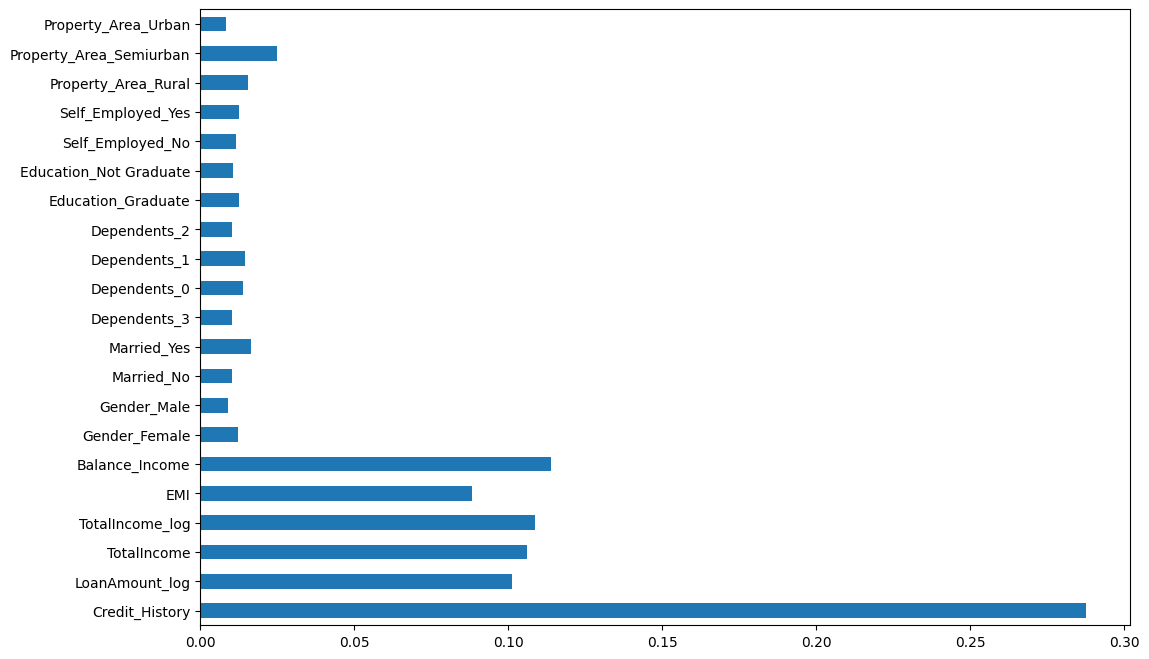

In [102]:
importances = pd.Series(forest_model.feature_importances_,index=x.columns)
importances.plot(kind='barh', figsize=(12,8))

## We can find out that 'Credit_History','Balance Income' feature are most important. So, feature engineering helped us in predicting our target variable